<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#imports

import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# load dataset as pandas dataframe
cancer_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
cancer = pd.read_csv(cancer_url, 
                     header=None,                       # create missing headers
                     names=['age','op_year','pos_ax','survived'])


In [7]:
# validate s number of observations: 306 observations, 4 attributes
print(cancer.shape)

(306, 4)


In [9]:
# check for missing values

print(cancer.isnull().sum())

age         0
op_year     0
pos_ax      0
survived    0
dtype: int64


In [0]:
cancer['binary_survived'] = cancer['survived'].replace({1:1,2:0})

In [16]:
cancer.head(8)

,age,op_year,pos_ax,survived,binary_survived
0,30,64,1,1,1
1,30,62,3,1,1
2,30,65,0,1,1
3,31,59,2,1,1
4,31,65,4,1,1
5,33,58,10,1,1
6,33,60,0,1,1
7,34,59,0,2,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [22]:
print(cancer['op_year'].value_counts())


58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: op_year, dtype: int64


In [0]:
# looks like all operations in this data occurred between 1958 and 1969. While
# date is theoretically continuous, it looks to be nicely binned by year into 11
# different bins. Age and positive axillary nodes need to be binned.

ax_bins = pd.cut(cancer['pos_ax'], 8)
age_bins = pd.cut(cancer['age'], 8)

# Some 3 way cross tabulations just for looking at as tables

ct_yas = pd.crosstab(age_bins,[cancer['binary_survived'], cancer['op_year']])
ct_yaxs = pd.crosstab(ax_bins,[cancer['binary_survived'], cancer['op_year']])
ct_axas = pd.crosstab(ax_bins, [cancer['binary_survived'], age_bins])

# 2 way cross tabulations to start looking for useful relationships and get
# some visual data

ct_ys = pd.crosstab(cancer['op_year'], # using percentages so that different 
                    cancer['binary_survived'], #numbers of patients each year
                    normalize='columns')       # don't skew plot too much

ct_as = pd.crosstab(age_bins,
                   cancer['binary_survived'])

In [70]:
# General statistics table

cancer.describe()

,age,op_year,pos_ax,survived,binary_survived
count,306.000000,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706,0.735294
std,10.803452,3.249405,7.189654,0.441899,0.441899
min,30.000000,58.000000,0.000000,1.000000,0.000000
25%,44.000000,60.000000,0.000000,1.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000,1.000000
max,83.000000,69.000000,52.000000,2.000000,1.000000


In [74]:
# Cross tabulation of survival, year, and number of positive axial nodes
ct_yaxs

binary_survived  0                            ...   1                          \
op_year         58 59 60 61 62 63 64 65 66 67 ...  60  61  62  63  64  65  66   
pos_ax                                        ...                               
(-0.052, 6.5]    8  6  1  2  4  4  6  8  4  2 ...  23  18  15  20  19  13  18   
(6.5, 13.0]      3  2  2  1  0  1  2  2  1  2 ...   0   3   0   0   4   1   2   
(13.0, 19.5]     0  1  0  0  1  1  0  1  1  0 ...   1   0   0   2   0   0   2   
(19.5, 26.0]     0  0  1  0  1  2  0  2  0  0 ...   0   1   1   0   0   1   0   
(26.0, 32.5]     0  0  0  0  0  0  0  0  0  0 ...   0   1   0   0   0   0   0   
(32.5, 39.0]     0  0  0  0  1  0  0  0  0  0 ...   0   0   0   0   0   0   0   
(39.0, 45.5]     0  0  0  0  0  0  0  0  0  0 ...   0   0   0   0   0   0   0   
(45.5, 52.0]     1  0  0  0  0  0  0  0  0  0 ...   0   0   0   0   0   0   0   

binary_survived             
op_year          67  68 69  
pos_ax                      
(-0.052, 6.5]    18  10  4  
(6.5, 13.0]       1   0  2  
(13.0, 19.5]      1   0  0  
(19.5, 26.0]      0   0  1  
(26.0, 32.5]      0   0  0  
(32.5, 39.0]      0   0  0  
(39.0, 45.5]      0   0  0  
(45.5, 52.0]      1   0  0  

[8 rows x 24 columns]

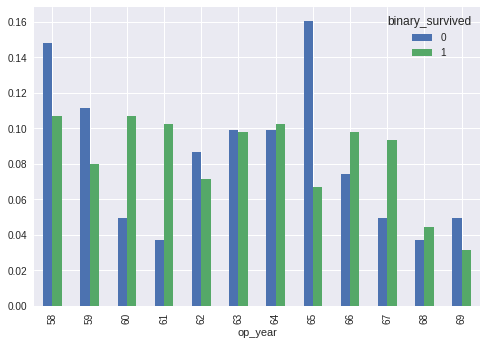

In [64]:
# This would suggest that the survival rate did not increase significantly 
# over the study period. Deaths spike in 1965, but ar low in 62 and 68.
ct_ys.plot(kind='bar')

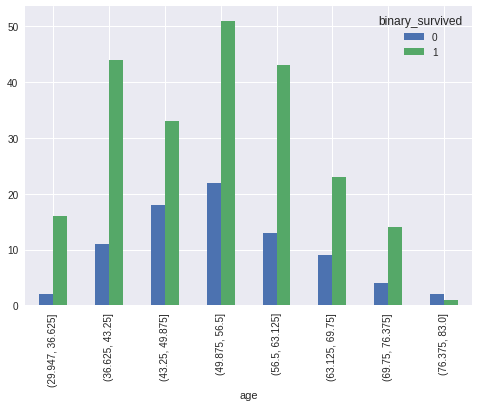

In [65]:
# This comparison would suggest that more people survive that die.
ct_as.plot(kind='bar')

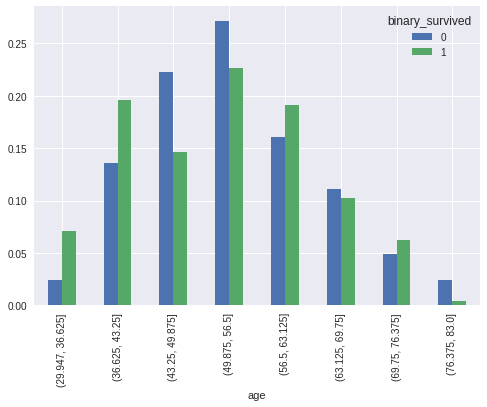

In [66]:
ct_as_avg = pd.crosstab(age_bins,
                   cancer['binary_survived'],
                   normalize='columns')

# Normalizing the columns suggests that a higher percentage of survivors were
# young, and at least in this dataset, middle age has the highest percentage of
# deaths. I am suspicious that there may be a confounding variable at play here.

ct_as_avg.plot(kind='bar')

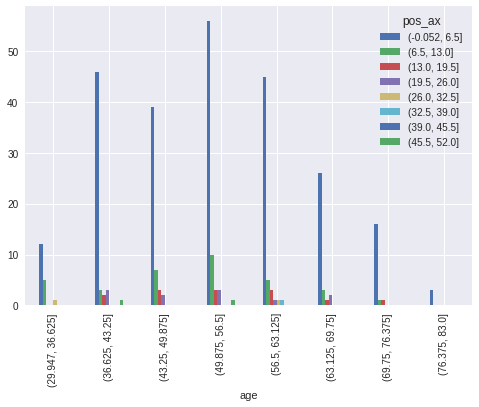

In [125]:
# Age appears to have no correlation with number of positive axillary 
# nodes detected. Most people have less than 10
ct_axa = pd.crosstab(age_bins, ax_bins)
ct_axa.plot(kind='bar')

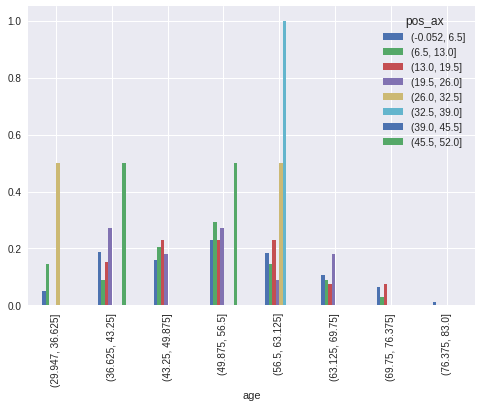

In [127]:
# percent of people in each node bin that by age.
# 

ct_axa = pd.crosstab(age_bins, ax_bins, normalize='columns')
ct_axa.plot(kind='bar')

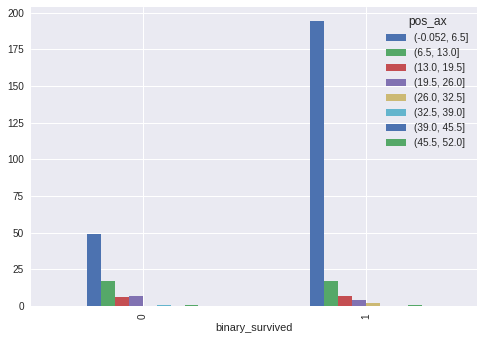

In [68]:
# May need to change binning...



ct_axs = pd.crosstab(cancer['binary_survived'], ax_bins)
ct_axs.plot(kind='bar')

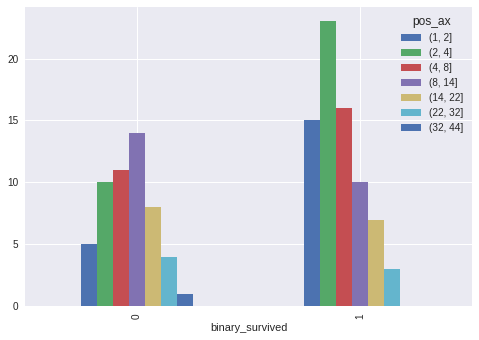

In [72]:
# better binning: this shows more effectively that more positive axillary nodes
# is correlated with less chance of survival

ax_more_bins = pd.cut(cancer['pos_ax'], bins=[1,2,4,8,14,22,32,44])


ct_axs_more_bins = pd.crosstab(cancer['binary_survived'], ax_more_bins)
ct_axs_more_bins.plot(kind='bar')

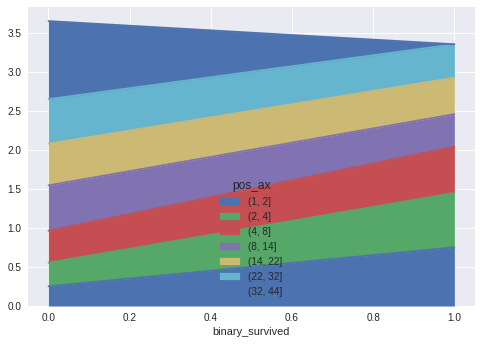

In [73]:
# While this is a bit messy, both below graphs seem to indicate that 
# most people with only a few positive axilary nodes survived, while as the
# number increases, the chance of survival goes down.

ct_axs_more_bins_norm = pd.crosstab(cancer['binary_survived'], 
                                   ax_more_bins,
                                   normalize='columns')
ct_axs_more_bins_norm.plot(kind='area')

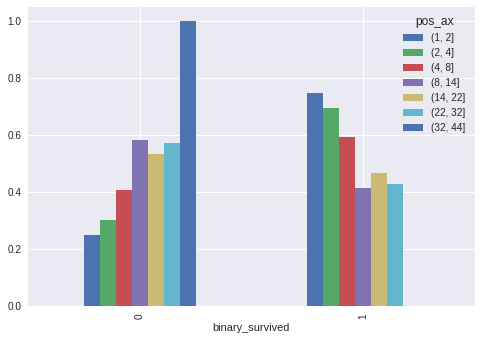

In [75]:
ct_axs_more_bins_norm.plot(kind='bar')

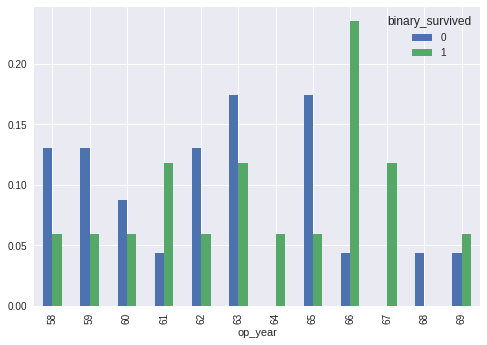

In [101]:
# While survival rate didn't significantly increase over time, I wanted to see
# if doctors got better at treating people with large numbers af nodes:
# it would seem that most people with more than 10 that died died before 1966

ax3 = cancer.loc[cancer['pos_ax'] > 10]
ct_ax3_year = pd.crosstab(ax3['op_year'], ax3['binary_survived'], normalize='columns')
ct_ax3_year.plot(kind='bar')

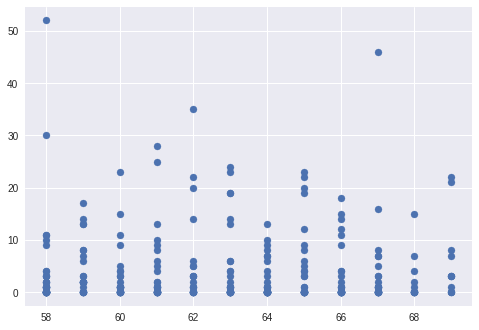

In [109]:
plt.scatter(cancer['op_year'], cancer['pos_ax'])

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**Feature with positive relationship with survival: **

**Positive Relationship**

- The only feature I could find with a positive relationship to survival was year of operation for people who had more than 10 positive axillary nodes. I would guess that in about 1966 doctors worked out a more effective treatment for these people.


**Negative Relationship**
- Number of positive axilary nodes seems to be negatively associated with survival rate. Overall more people survive than die, but the more nodes they have, the more likely they are to die. The area plot shows it best I believe, as you go from bottom (least nodes) to top(most), the wide areas move to the left.

  Also, It would appear that being younger gives people a better chance of survival, while middle age people have less chance, and percentages evened out above 60.
  I would guess that there are a number of outside factors at play in this, including business, family status, etc. that effect likelyhood of early detection.

**Relationship** 
- There appear to be several trends going on here. The above scatter plot of operation year vs detected positive axillary nodes shows the extreme examples trending down. My best guess is that this indicates earlier detection. The percentage of people operated on with more than 10 nodes who died also trends down over the period of the study. This may indicate better treatment methods for people with more advanced cancer.

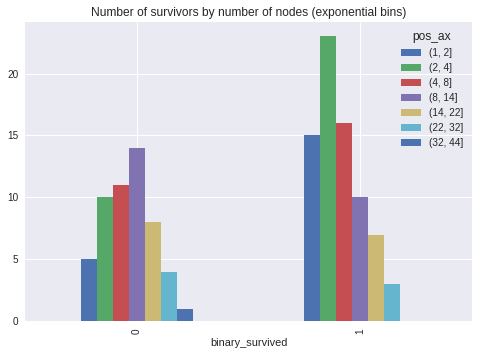

In [135]:
# This shows more effectively that more positive axillary nodes
# is correlated with less chance of survival
# Crosstab of number of nodes and survival

ct_axs_more_bins.plot(kind='bar', 
            title='Number of survivors by number of nodes (exponential bins)');

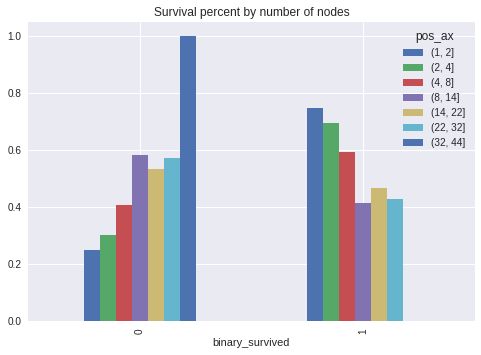

In [134]:
# Plot of average survival rate per node number bin:

# Note deaths trend up with number of nodes, while survival trends down



ct_axs_more_bins_avg = pd.crosstab(cancer['binary_survived'], 
                                   ax_more_bins, 
                                   normalize='columns')
ct_axs_more_bins_avg.plot(kind='bar', title='Survival percent by number of nodes');

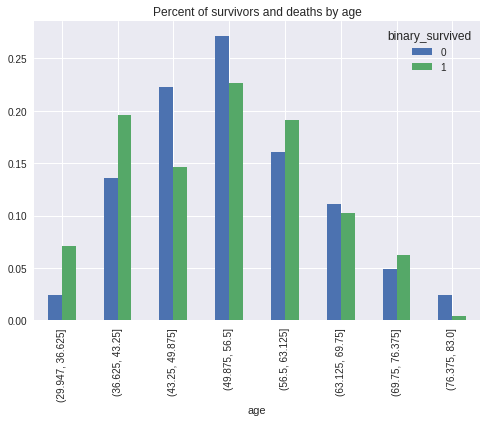

In [132]:
# Plot of percent of survivors by age.
# Note sharp decrease in survival in 40's bin

ct_as_avg.plot(kind='bar', title='Percent of survivors and deaths by age');

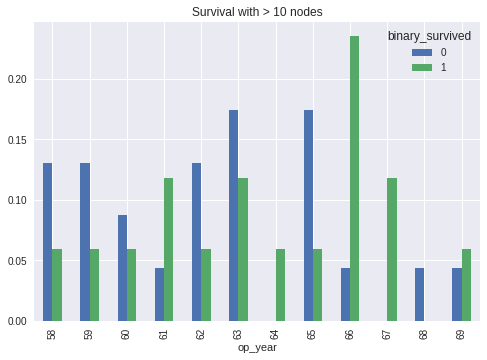

In [130]:
# This bar graph splits survivors and deaths as percentage that occurred for 
# each operation year. 
# Almost all of the deaths occurred before
ct_ax3_year.plot(kind='bar', title='Survival with > 10 nodes');